In [186]:
import numpy as np
import matplotlib.pyplot as plt
from node import Node
from ant import Ant
from aco import ACO
import random

# HYPER PARAMETERS
INSTANCE_SIZE = 20

# PHEROMONE_WEIGHTING = 1
# HEURISTIC_WEIGHTING = 1
PHEROMONE_EVAPORATION_CONSTANT = 0.2 # From 0 to 1, proportion of pheromone which evaporates each iteration
TSP_PHEROMONE_AMOUNT = 1

In [3]:
def get_x(node_list):
    return [node.x() for node in node_list]

def get_y(node_list):
    return [node.y() for node in node_list]



In [126]:



def draw_pheromones(ax):
    for node1 in instance_points:
        for node2 in instance_points:
            if node1 is not node2:
                ax.plot([node1.x(), node2.x()], [node1.y(), node2.y()], color='red')#, alpha=min(1, node1.edge_pheromones[id(node2)] / 1000))
    return []

def draw_nodes(ax):
    return ax.scatter(get_x(instance_points), get_y(instance_points), s=5)



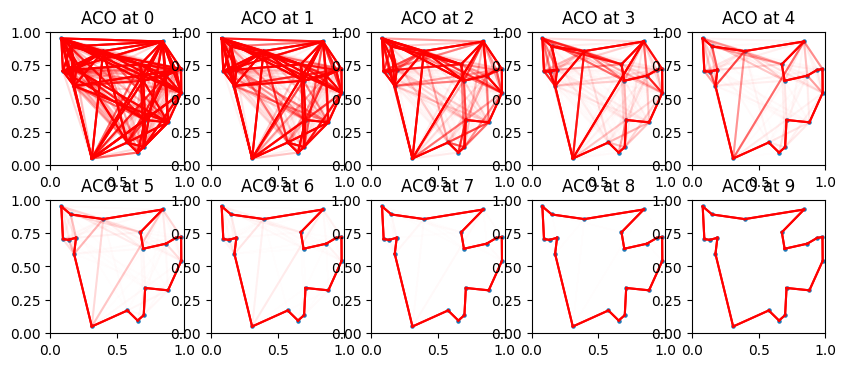

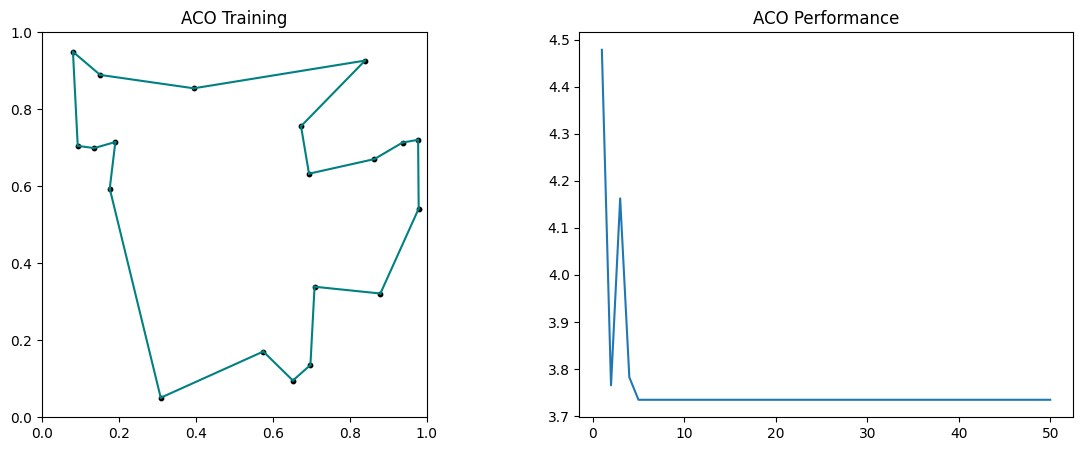

In [188]:

instance_points = [Node(np.random.random(size=(2))) for _ in range(INSTANCE_SIZE)]
for point in instance_points:
    point.initialise_pheromones(instance_points)

path_lengths = []
num_iterations = 50
plt.figure(figsize=(10, 4))
for x in range(num_iterations):
    ants = [Ant(instance_points[0]) for _ in range(20)]
    # ants = [Ant(random.choice(instance_points)) for _ in range(20)]

    for _ in range(INSTANCE_SIZE-1):
        for ant in ants:
            c = ant.current
            ant.generate_valid_moves(instance_points)
            ant.move()
            n = ant.current

    for node in instance_points:
        node.deplete_pheromones(PHEROMONE_EVAPORATION_CONSTANT)
    for i, ant in enumerate(ants):
        path = ant.visited
        path_distance = 0

        distances = []

        for index, node in enumerate(path):
            if index == len(path) - 1:
                other = path[0]
            else:
                other = path[index+1]
            distance = np.linalg.norm(node.position - other.position)
            path_distance += distance
            distances.append(distance)

        pheromone_to_add = TSP_PHEROMONE_AMOUNT / path_distance
        for index, node in enumerate(path):
            pheromone_to_add = TSP_PHEROMONE_AMOUNT / distances[i]
            if index == len(path) - 1:
                other = path[0]
            else:
                other = path[index+1]
            node.add_to_pheromones(other, pheromone_to_add)
            other.add_to_pheromones(node, pheromone_to_add)

        if i == 0:
            path_lengths.append(path_distance)
    
    if not x % 5:
        plt.subplot(2, 5, x//5+1, aspect='equal', ylim=(0, 1), xlim=(0, 1), title=f'ACO at {x//5}')
        for node1 in instance_points:
            for node2 in instance_points:
                if node1 is not node2:
                    plt.plot([node1.x(), node2.x()], [node1.y(), node2.y()], color='red', alpha=min(1, node1.edge_pheromones[id(node2)] / 10))
        plt.scatter(get_x(instance_points), get_y(instance_points), s=5)


plt.figure(figsize=(14, 5))
searchAxes = plt.subplot(1, 2, 1, aspect='equal', ylim=(0, 1), xlim=(0, 1), title='ACO Training')
ant = Ant(instance_points[0], use=True)
for _ in range(INSTANCE_SIZE-1):
    c = ant.current
    ant.generate_valid_moves(instance_points)
    ant.move()
    n = ant.current
    searchAxes.plot([c.x(), n.x()], [c.y(), n.y()], color='teal')
searchAxes.plot([n.x(), ant.visited[0].x()], [n.y(), ant.visited[0].y()], color='teal')
searchAxes.scatter(get_x(instance_points), get_y(instance_points), s=10, color='black')

performanceAxes = plt.subplot(1, 2, 2, title='ACO Performance')
performanceAxes.plot(np.linspace(1, num_iterations, num_iterations).astype(int), path_lengths)
